In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

In [2]:
%cd ../
!mkdir tmp
%cd tmp

/kaggle
/kaggle/tmp


In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [19]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '/kaggle/input/datasetkcl/datasetkcl/train',
    val = '/kaggle/input/datasetkcl/datasetkcl/valid',
    test = '/kaggle/input/datasetkcl/datasetkcl/test',
    nc = 5,
    names = ['bottle', 'cell-phone', 'cigarette', 'electronic-cigarette', 'smoke']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [20]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/kaggle/tmp/yolov5


In [21]:
!wandb disabled
!python train.py --img 640 --batch 64 --epochs 20 --data /kaggle/tmp/yolov5/data/../data.yaml --weights yolov5s.pt 

/bin/bash: wandb: command not found
2024-05-25 08:14:13.877872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 08:14:13.877925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 08:14:13.879303: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/kaggle/tmp/yolov5/data/../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_wei

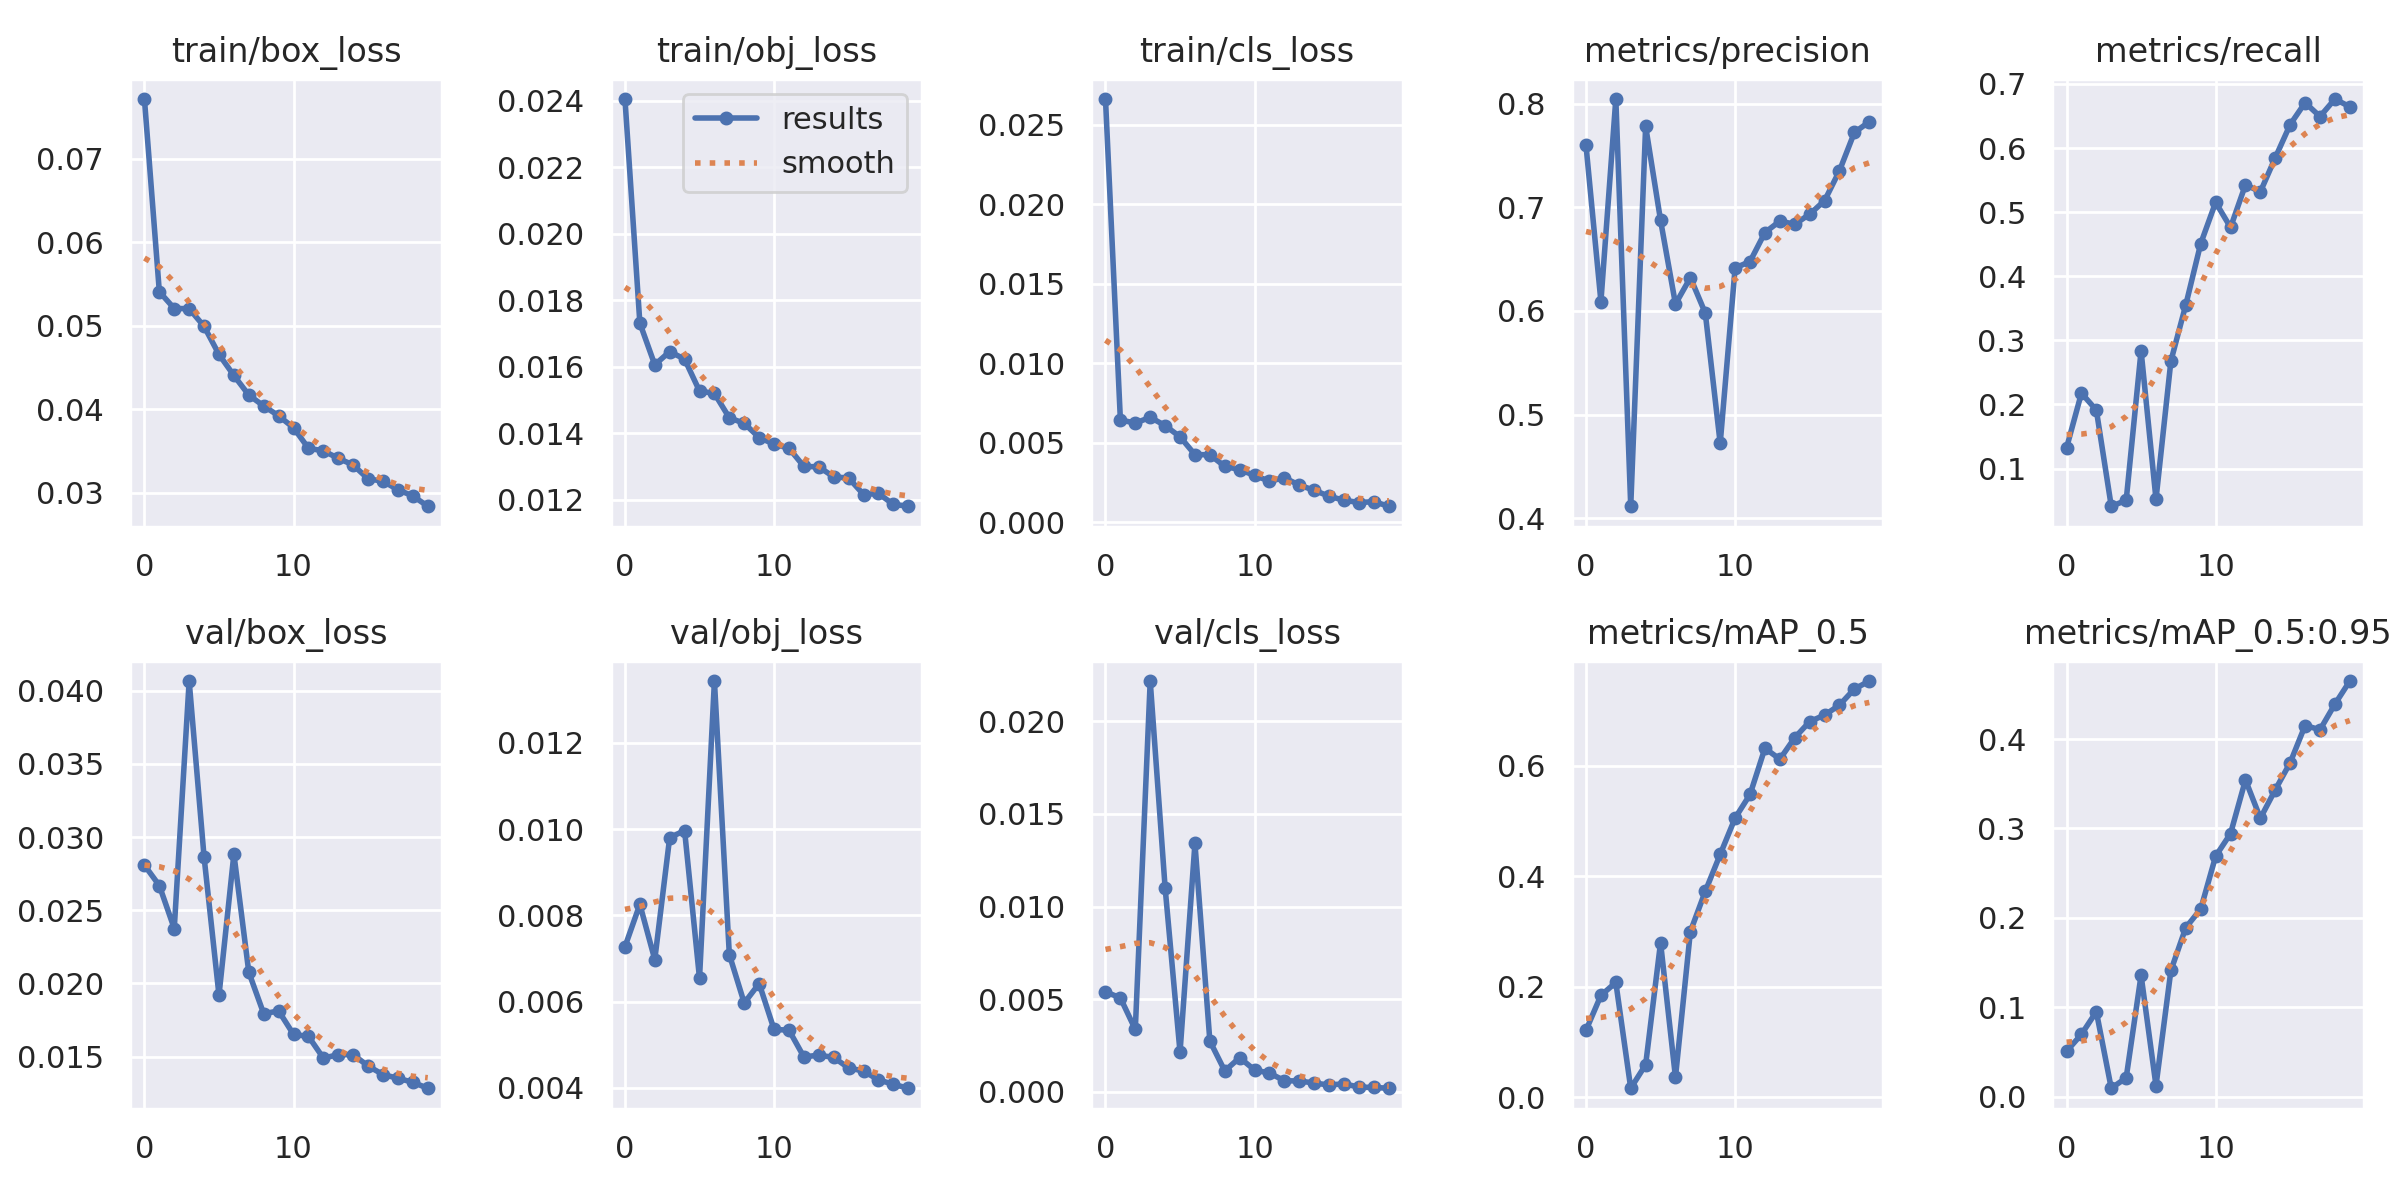

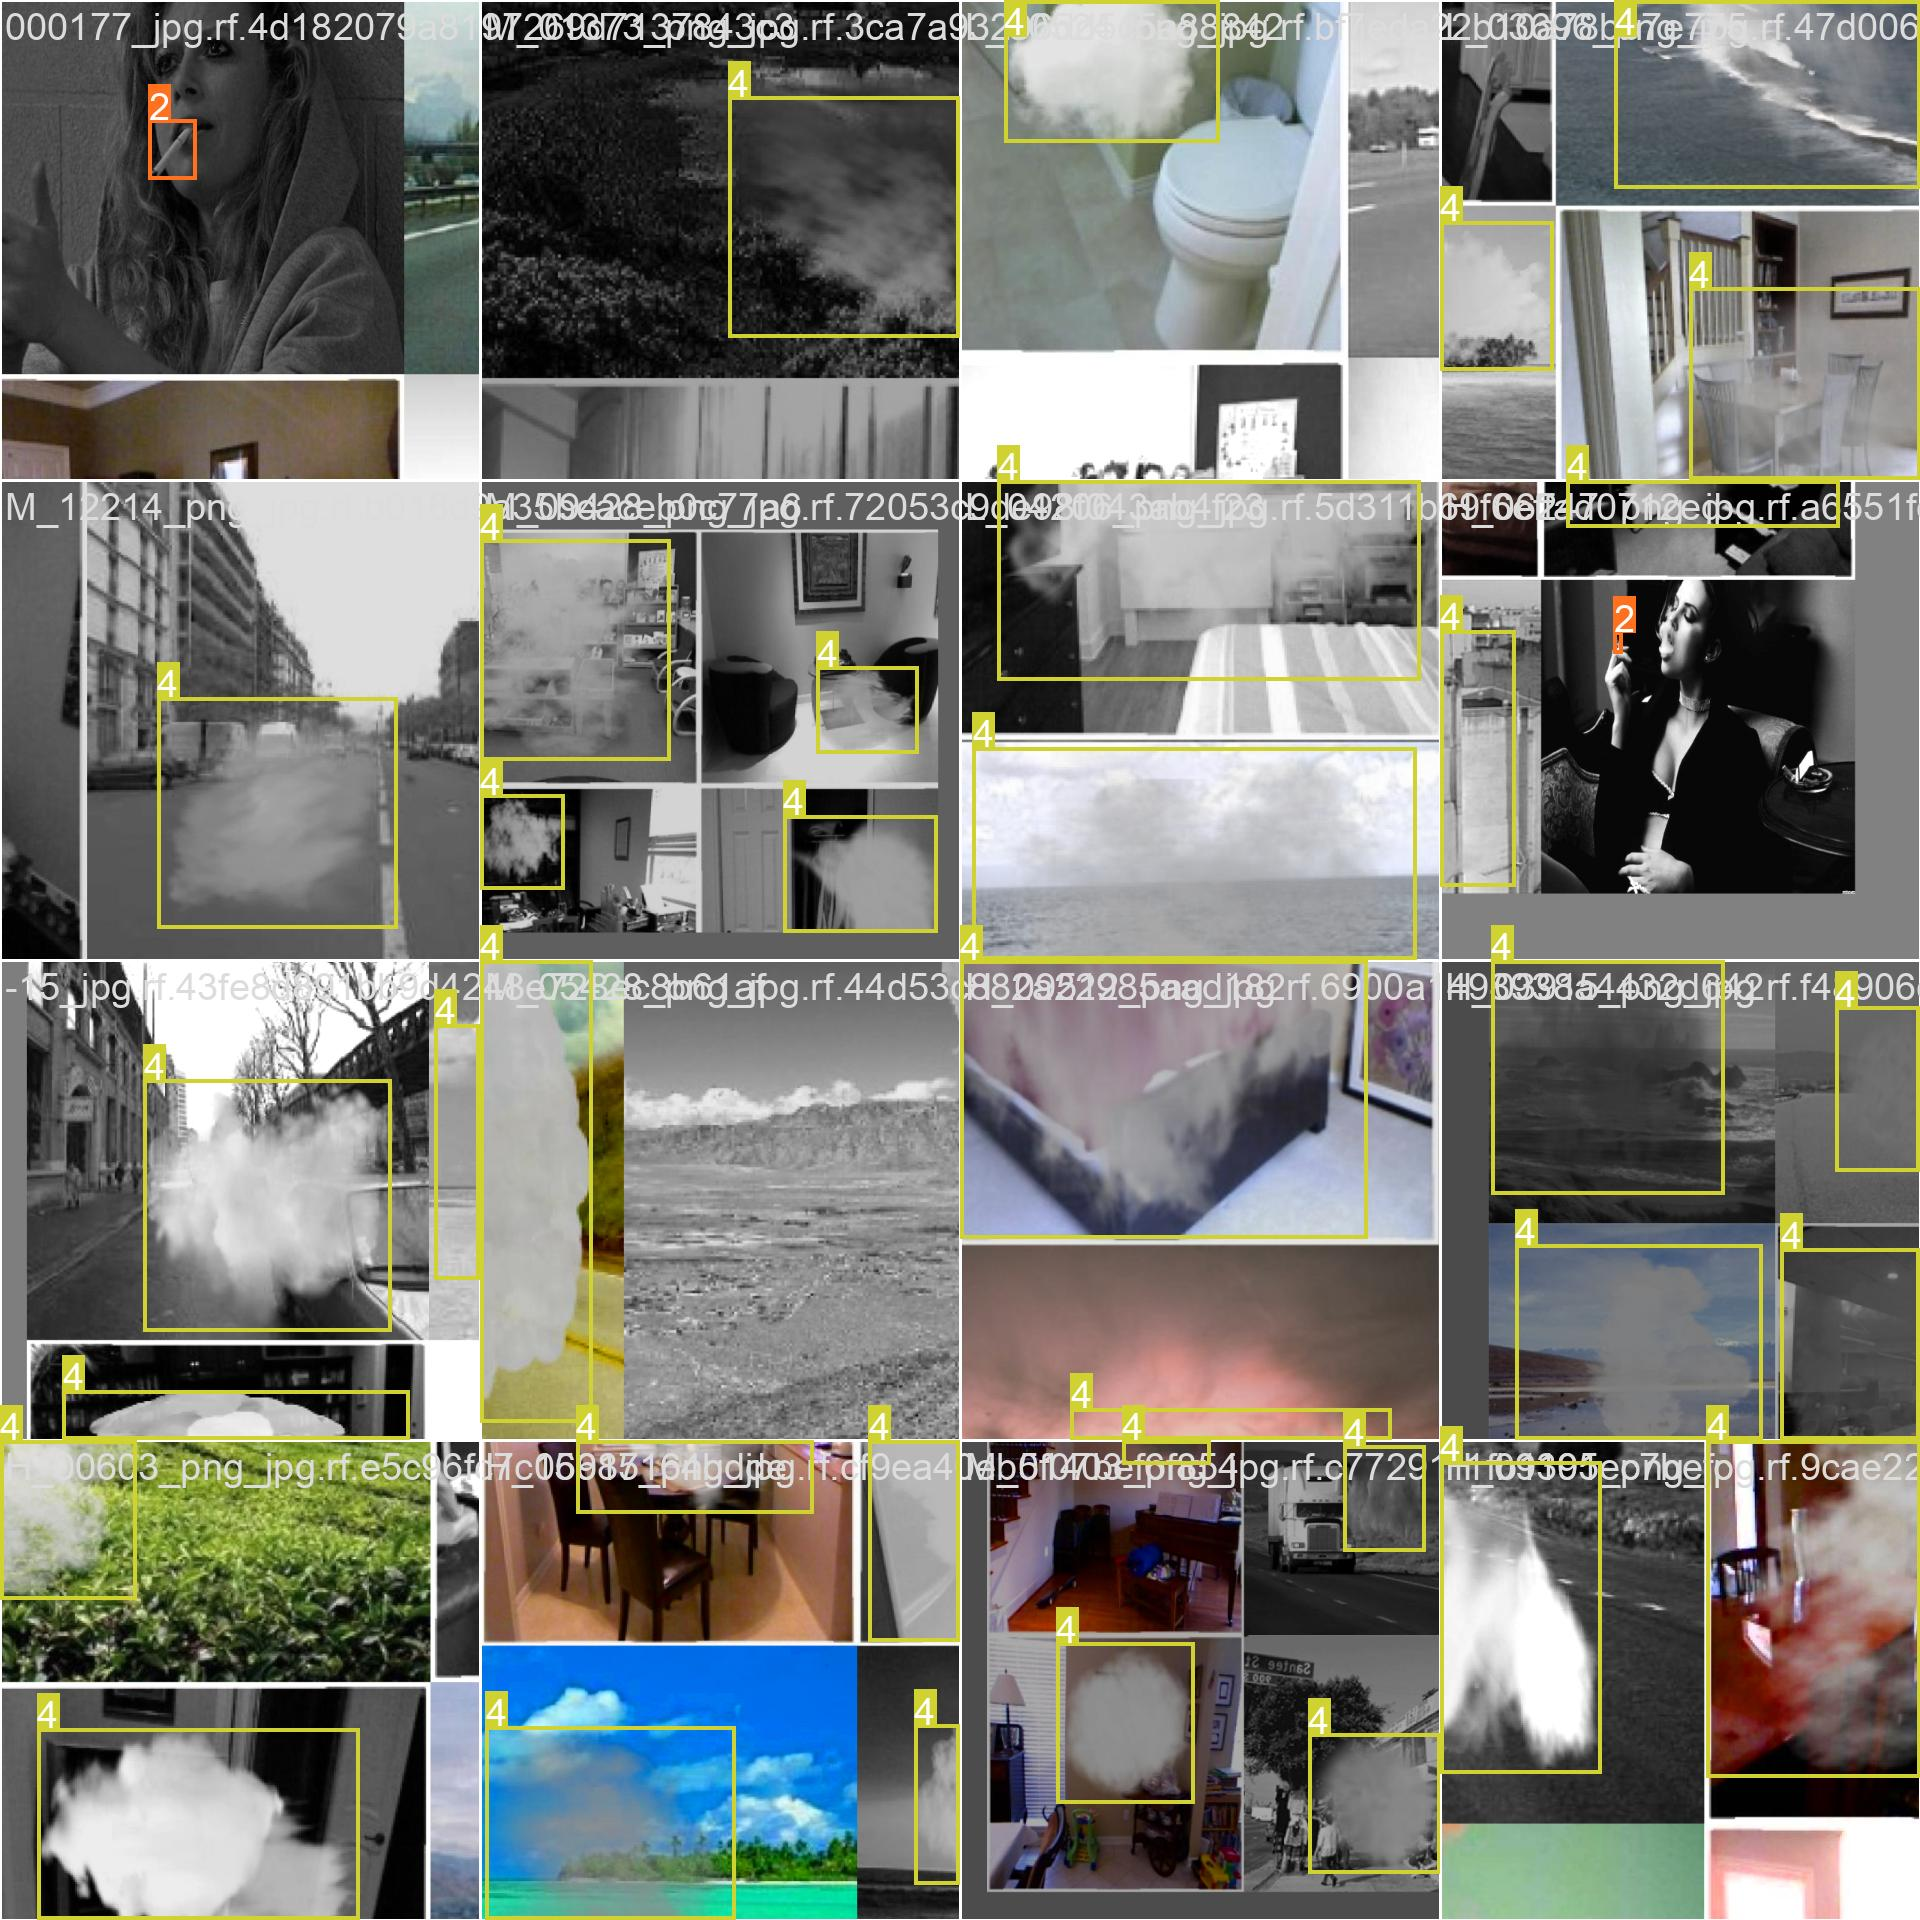

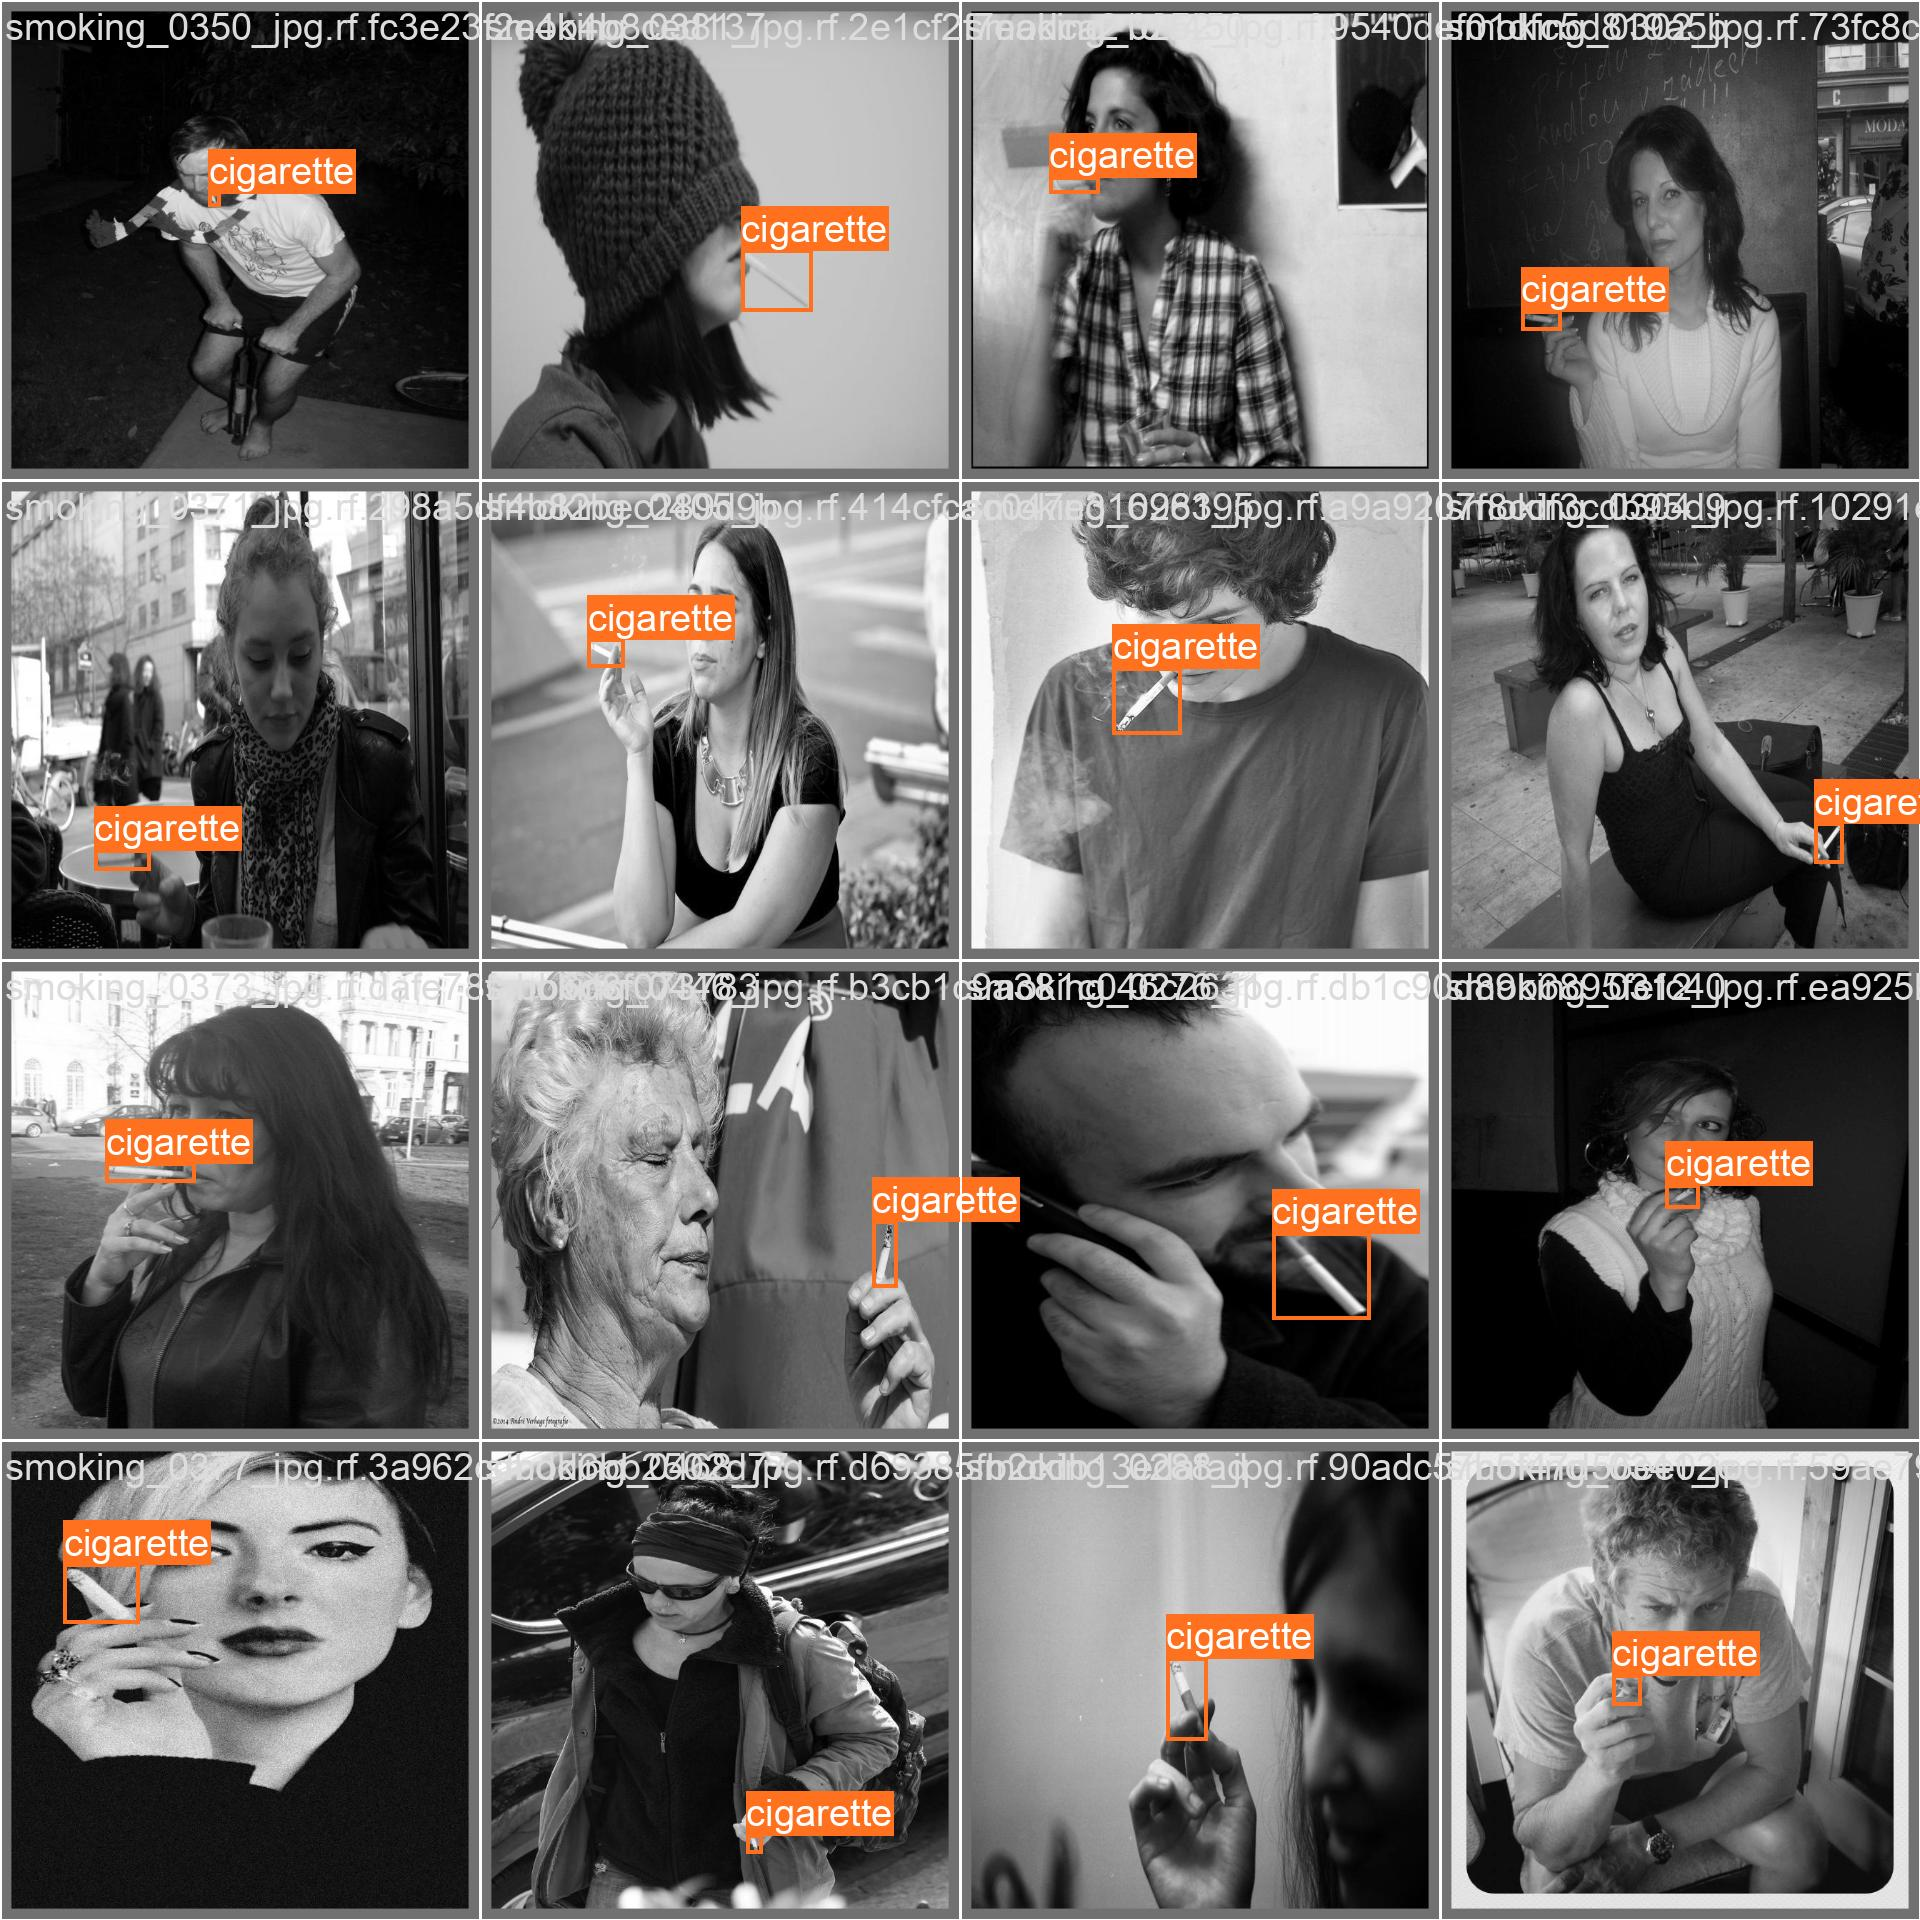

In [22]:
from IPython.display import Image, display

# Menampilkan ringkasan hasil pelatihan
display(Image(filename='runs/train/exp3/results.png'))

# Menampilkan contoh batch dari data pelatihan
display(Image(filename='runs/train/exp3/train_batch0.jpg'))
display(Image(filename='runs/train/exp3/val_batch0_labels.jpg'))


In [24]:
import shutil

# Salin file model ke direktori kerja
shutil.copy('runs/train/exp3/weights/best.pt', '/kaggle/working/best.pt')


'/kaggle/working/best.pt'

In [29]:
!wget /kaggle/working/best.pt

/kaggle/working/best.pt: Scheme missing.


In [28]:
import os

# Lihat isi direktori kerja
print(os.listdir('/kaggle/working'))


['.virtual_documents', 'best.pt']
